# Bike Price Prediction Using Linear Regression

Use Linear Regression (Ordinary Least Square)to Predict Bike Price




# Get Understanding about Data Set


There are 8 variables in the dataset.
  1. Brand- manufacturing company
  2. Model-model of bike
  3. Selling_Price- selling price of bike
  4. Year-year of manufacturing
  5. seller_Type-type of seller
  6. Owner - Owner type
  7. KM_Showroom_Price -ex-showroom price

# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

# import dataframe

In [3]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Bike%20Prices.csv')

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [6]:
# dropping missing values if any

df.dropna(inplace=True)

In [7]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [8]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [9]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [10]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [11]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

# Get column Names

In [13]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

# Get Shape of DataFrame

In [14]:
df.shape

(626, 8)

# Get Encoding of Categorical features

In [15]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [16]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace = True)

# Define y (dependent or label or target variable) and X (independent or features or attribute variable)

In [17]:
y = df['Selling_Price']

In [18]:
y.shape

(626,)

In [19]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [20]:
x = df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [21]:
x.shape

(626, 5)

In [22]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


# Get Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

# Get Model Train

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

# Get Model Prediction

In [30]:
y_pred = lr.predict(x_test)

In [31]:
y_pred.shape

(188,)

In [32]:
y_pred

array([ 27210.52271467,  56340.08335169,  63471.94671996,  53627.63844777,
        55612.75744261,  53888.92259714,  33751.35275104,  60311.49501864,
       113713.05684468,  76639.49332963,  27826.73993812,  49919.83255837,
        65886.64311455,  26755.12664071,  48277.75426031, 127646.5607935 ,
        70047.1066163 ,  39350.6796366 ,  36081.0359788 ,  45360.79436347,
        48079.89470576,  44803.02464796,  55161.4402611 ,  71041.51821319,
        91689.22699173,  49301.53594633,  55988.19326256, 108171.54600298,
        32771.06897893,  25468.20072998,  17128.61806167, 179271.41130778,
        45698.99857623,  31371.09285094,  67886.5210673 ,  41492.49575813,
        56855.22238596,  47820.47003463,  74682.14053952,  24984.21822739,
        55374.00513699,  41412.36775219,  67991.6028776 ,  26553.59421833,
        89788.69870689,  45764.83633687, 133888.03770407, 106988.11382519,
        71176.40667715,  25332.25485948,  79512.43778819,  63914.38088175,
        28632.12110987,  

# Get Model Evaluation 

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
mean_squared_error(y_test,y_pred)

554715615.5020783

In [36]:
mean_absolute_error(y_test,y_pred)

12225.737010391547

In [37]:
r2_score(y_test,y_pred)

0.8810414402989845

#  Get Visualization of Actual Vs predicted Results

Text(0.5, 1.0, 'Actual Price Vs Predicted Price')

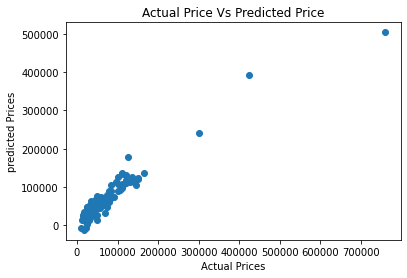

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("predicted Prices")
plt.title("Actual Price Vs Predicted Price")

# Get Future Predictions

lets aelect a random sample from existing dataset as new value
Steps to follow

     1. Extract a random row using sample function 
     2. Separate X and Y
     3. Predict

In [42]:
df_new = df.sample(1)

In [43]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
612,Royal,Royal Enfield Classic Stealth Black,160000,2018,0,0,7500,204977.0


In [44]:
df_new.shape

(1, 8)

In [46]:
x_new = df_new.drop(['Brand','Model','Selling_Price'],axis =1)

In [47]:
y_pred_new = lr.predict(x_new)

In [48]:
y_pred_new

array([150105.70011059])